In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)
plt.rcParams['font.size'] = 10

### Machine learning pipeline
$ X(Input) ----> Model (F(x)) --------> Y(Output) $
- Add External data
- Use existing data

### Feature Enginerring is divided into two
- Feature preprocessing: Implies updating or transforming existing features
- Feature Generation: Is creating new features from the existing data 

#### Feature preprocessing: Transformation
Replacing a variable by function
- Logarithm
- Square/cube
- Square root / cube root
- Reciprocal

Examples: 
1. If dependent and independent have non linear relationshiop
2. If a histogram is positively skewed: This may be due to presence of outliers in the data. Having a normal distribution is better


Right skewed: $ n^th $ root or $ log(x) $


Left skewed: $ n^th $ power or  $exp$

** Note log(x):x must always be greater than 0

In [2]:
bigmart = pd.read_csv("Train-Set.csv")

In [3]:
bigmart.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [4]:
bigmart

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
bigmart_cols = bigmart.columns

In [6]:
bigmart[bigmart_cols[0]].nunique()

1559

In [7]:
bigmart[bigmart_cols[2]].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

<Axes: xlabel='ProductVisibility', ylabel='Count'>

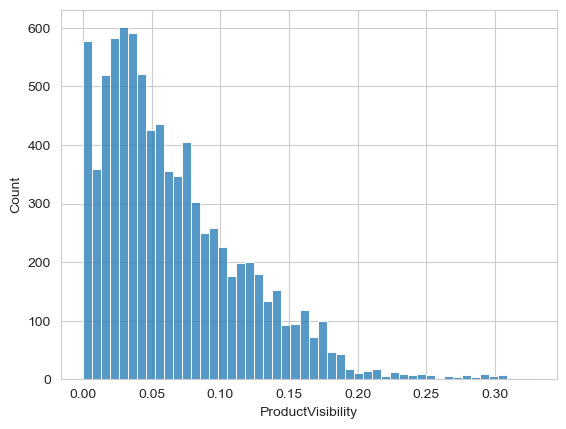

In [8]:
sns.histplot(x=bigmart['ProductVisibility'])

In [9]:
item_visibility_sqrt = np.sqrt(bigmart['ProductVisibility'])

<Axes: xlabel='ProductVisibility', ylabel='Count'>

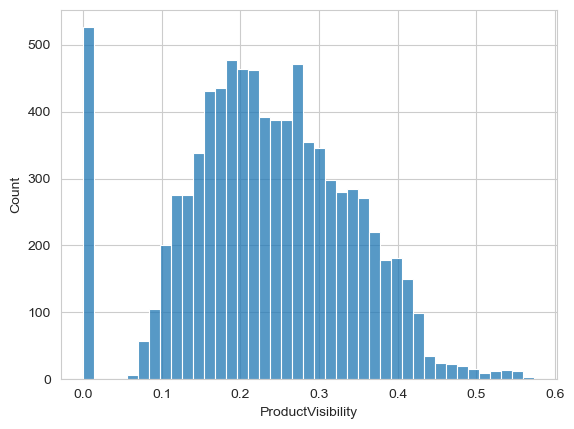

In [10]:
sns.histplot(x=item_visibility_sqrt)

In [11]:
item_visibility_log = np.log(bigmart['ProductVisibility'])
item_visibility_log

C:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      -4.132215
1      -3.948780
2      -4.088756
3           -inf
4           -inf
          ...   
8518   -2.868511
8519   -3.057982
8520   -3.347099
8521   -1.929501
8522   -3.103801
Name: ProductVisibility, Length: 8523, dtype: float64

In [12]:
bigmart[bigmart['ProductVisibility'] <=0 ].count()

ProductID            526
Weight               436
FatContent           526
ProductVisibility    526
ProductType          526
MRP                  526
OutletID             526
EstablishmentYear    526
OutletSize           382
LocationType         526
OutletType           526
OutletSales          526
dtype: int64

In [13]:
bigmart[bigmart['ProductVisibility'] ==0 ].count()

ProductID            526
Weight               436
FatContent           526
ProductVisibility    526
ProductType          526
MRP                  526
OutletID             526
EstablishmentYear    526
OutletSize           382
LocationType         526
OutletType           526
OutletSales          526
dtype: int64

<Axes: >

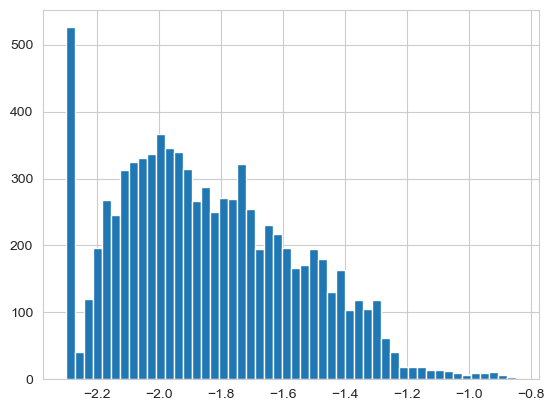

In [14]:
item_visibility_log = np.log(bigmart['ProductVisibility']+0.1)
item_visibility_log.hist(bins=50)

#### Here we get the visibilityin negatives. This is beacause the values in the columns are less than 1. Let's increase the scale of the values
##### Note increasing the scale won't affect the distribution at all.

<Axes: xlabel='ProductVisibility', ylabel='Count'>

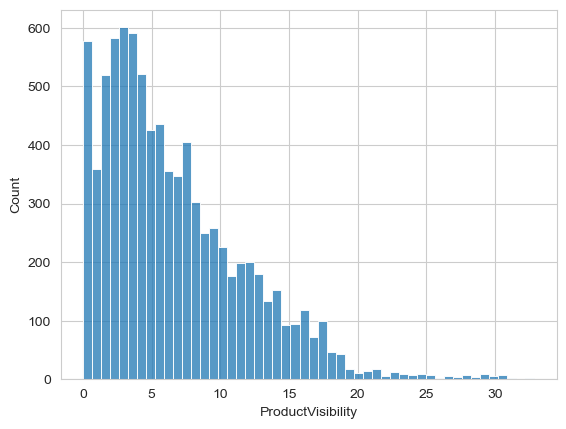

In [15]:
visibility = bigmart['ProductVisibility'] * 100
sns.histplot(visibility, bins=50)

<Axes: xlabel='ProductVisibility', ylabel='Count'>

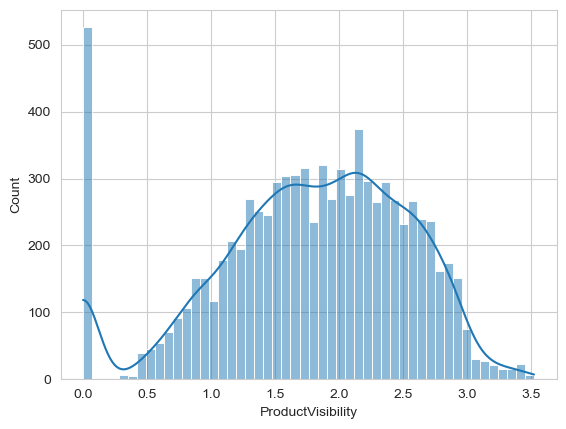

In [16]:
item_visibility_log_a = np.log(visibility+1)
sns.histplot(item_visibility_log_a, bins=50, kde=True)

### Feature Processing: Scaling
Two common methods are:
1. MinMax Scaling : $ xi - min(x) / max(x)  - min(X) $
2. Standard Scaling: $ X^` = x- x^- / S.D $
 


In [17]:
data_to_scale = bigmart[['MRP', "ProductVisibility"]]
data_to_scale

,MRP,ProductVisibility
0,249.8092,0.016047
1,48.2692,0.019278
2,141.6180,0.016760
3,182.0950,0.000000
4,53.8614,0.000000
...,...,...
8518,214.5218,0.056783
8519,108.1570,0.046982
8520,85.1224,0.035186
8521,103.1332,0.145221


### Using Min Max Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(data_to_scale)

MinMaxScaler()

In [20]:
scaled_data = scaler.transform(data_to_scale)

In [21]:
scaled_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())

In [22]:
scaled_df.describe()

,MRP,ProductVisibility
count,8523.000000,8523.000000
mean,0.465635,0.201382
std,0.264327,0.157123
min,0.000000,0.000000
25%,0.265437,0.082187
50%,0.474209,0.164228
75%,0.655156,0.288026
max,1.000000,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(data_to_scale)

StandardScaler()

In [25]:
scaled_data = scaler.transform(data_to_scale)

In [26]:
scaled_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())

In [27]:
scaled_df

,MRP,ProductVisibility
0,1.747454,-0.970732
1,-1.489023,-0.908111
2,0.010040,-0.956917
3,0.660050,-1.281758
4,-1.399220,-1.281758
...,...,...
8518,1.180783,-0.181193
8519,-0.527301,-0.371154
8520,-0.897208,-0.599784
8521,-0.607977,1.532880


#### Categorical Encoding
We have two types 
1. OneHot encoding: Used if we have two or more categorical value
2. Label encoding: Used if we have categorical value which are ordinal in nature i.e in order

In [28]:
bigmart.select_dtypes("object")

,ProductID,FatContent,ProductType,OutletID,OutletSize,LocationType,OutletType
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [29]:
bigmart['OutletType'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64

In [30]:
pd.get_dummies(bigmart['OutletType'])

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(bigmart.select_dtypes("object"))

In [32]:
encoded_data = encoder.transform(bigmart.select_dtypes("object"))

In [33]:
pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

,ProductID_DRA12,ProductID_DRA24,ProductID_DRA59,ProductID_DRB01,ProductID_DRB13,ProductID_DRB24,ProductID_DRB25,ProductID_DRB48,ProductID_DRC01,ProductID_DRC12,ProductID_DRC13,ProductID_DRC24,ProductID_DRC25,ProductID_DRC27,ProductID_DRC36,ProductID_DRC49,ProductID_DRD01,ProductID_DRD12,ProductID_DRD13,ProductID_DRD15,ProductID_DRD24,ProductID_DRD25,ProductID_DRD27,ProductID_DRD37,ProductID_DRD49,ProductID_DRD60,ProductID_DRE01,ProductID_DRE03,ProductID_DRE12,ProductID_DRE13,ProductID_DRE15,ProductID_DRE25,ProductID_DRE27,ProductID_DRE37,ProductID_DRE48,ProductID_DRE49,ProductID_DRE60,ProductID_DRF01,ProductID_DRF03,ProductID_DRF13,ProductID_DRF15,ProductID_DRF23,ProductID_DRF25,ProductID_DRF27,ProductID_DRF36,ProductID_DRF37,ProductID_DRF48,ProductID_DRF49,ProductID_DRF51,ProductID_DRF60,...,ProductID_NCZ17,ProductID_NCZ18,ProductID_NCZ29,ProductID_NCZ30,ProductID_NCZ41,ProductID_NCZ42,ProductID_NCZ53,ProductID_NCZ54,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,ProductType_Baking Goods,ProductType_Breads,ProductType_Breakfast,ProductType_Canned,ProductType_Dairy,ProductType_Frozen Foods,ProductType_Fruits and Vegetables,ProductType_Hard Drinks,ProductType_Health and Hygiene,ProductType_Household,ProductType_Meat,ProductType_Others,ProductType_Seafood,ProductType_Snack Foods,ProductType_Soft Drinks,ProductType_Starchy Foods,OutletID_OUT010,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,OutletSize_High,OutletSize_Medium,OutletSize_Small,OutletSize_nan,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
bigmart['OutletSize'].value_counts()

Medium    2793
Small     2388
High       932
Name: OutletSize, dtype: int64

In [36]:
l_encoder= LabelEncoder().fit_transform(["Small", "Medium", "High"])

In [37]:
l_encoder= LabelEncoder().fit(bigmart['OutletSize'])

In [38]:
encoded = l_encoder.transform(bigmart['OutletSize'])

In [39]:
pd.DataFrame(encoded, columns=["Outlet size"])

,Outlet size
0,1
1,1
2,1
3,3
4,0
...,...
8518,0
8519,3
8520,2
8521,1


### Feature Preprocessing: Combine Sparse Classes
Performing OneHotEncoding to large number of unique values can be alot so hence combining sparse classess is the best option. For example if we have 500 unique countries and let's say some of the countries mentioned only have little value counts we can classify the countries with the low count as "Others"Other rather than performing OneHotEncoding on each of them

In [40]:
bigmart.select_dtypes("object").value_counts()

ProductID  FatContent  ProductType            OutletID  OutletSize  LocationType  OutletType       
DRA12      LF          Soft Drinks            OUT035    Small       Tier 2        Supermarket Type1    1
FDV27      Regular     Meat                   OUT019    Small       Tier 1        Grocery Store        1
FDV32      Low Fat     Fruits and Vegetables  OUT035    Small       Tier 2        Supermarket Type1    1
                                              OUT019    Small       Tier 1        Grocery Store        1
                                              OUT018    Medium      Tier 3        Supermarket Type2    1
                                                                                                      ..
FDJ33      Regular     Snack Foods            OUT018    Medium      Tier 3        Supermarket Type2    1
FDJ32      Low Fat     Fruits and Vegetables  OUT027    Medium      Tier 3        Supermarket Type3    1
                                              OUT013    High

In [41]:
len(bigmart['OutletID'].value_counts())

10

In [42]:
len(bigmart['ProductType'].value_counts())

16

In [43]:
bigmart.nunique()

ProductID            1559
Weight                415
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              3
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

In [44]:
bigmart['ProductID'].value_counts().to_dict()

{'FDW13': 10,
 'FDG33': 10,
 'NCY18': 9,
 'FDD38': 9,
 'DRE49': 9,
 'FDV60': 9,
 'NCQ06': 9,
 'FDF52': 9,
 'FDX04': 9,
 'NCJ30': 9,
 'FDV38': 9,
 'NCF42': 9,
 'FDT07': 9,
 'FDW26': 9,
 'NCL31': 9,
 'FDU12': 9,
 'FDG09': 9,
 'FDQ40': 9,
 'FDX20': 9,
 'NCI54': 9,
 'FDX31': 9,
 'FDP25': 9,
 'FDW49': 9,
 'FDF56': 9,
 'FDO19': 9,
 'DRN47': 9,
 'NCB18': 9,
 'FDE11': 8,
 'NCX05': 8,
 'FDQ39': 8,
 'FDT55': 8,
 'FDO32': 8,
 'FDT40': 8,
 'FDZ20': 8,
 'FDH27': 8,
 'FDY49': 8,
 'FDS33': 8,
 'FDR04': 8,
 'FDR43': 8,
 'FDR59': 8,
 'FDJ55': 8,
 'FDT24': 8,
 'FDY55': 8,
 'FDV09': 8,
 'FDU23': 8,
 'FDY47': 8,
 'DRD25': 8,
 'FDK58': 8,
 'FDL58': 8,
 'FDX58': 8,
 'FDR44': 8,
 'FDP28': 8,
 'FDA39': 8,
 'FDH28': 8,
 'DRF27': 8,
 'FDX21': 8,
 'FDY56': 8,
 'FDF05': 8,
 'FDL20': 8,
 'FDY03': 8,
 'NCK05': 8,
 'FDS55': 8,
 'DRA59': 8,
 'FDG24': 8,
 'NCE54': 8,
 'FDZ21': 8,
 'FDA04': 8,
 'FDW24': 8,
 'FDT49': 8,
 'DRF23': 8,
 'FDD05': 8,
 'FDH10': 8,
 'FDX50': 8,
 'FDT32': 8,
 'FDK20': 8,
 'FDU13': 8,
 'FDN56': 

In [58]:
temp = bigmart["ProductID"].value_counts()
bigmart['ProductID_count'] = bigmart['ProductID'].apply(lambda x: temp[x])

bigmart[["ProductID", "ProductID_count"]]

bigmart[bigmart['ProductID_count'] < 4].count(axis=1)

5       13
23      12
51      13
52      13
61      12
        ..
8406    13
8426    13
8467    13
8471    12
8472    12
Length: 418, dtype: int64

In [59]:
for i in range(0, len(bigmart)):
    if bigmart['ProductID_count'][i] < 4:
        bigmart['ProductID'][i] = "Others"

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_14052\3246697669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart['ProductID'][i] = "Others"


### Feature Generation: Binning

In [60]:
bigmart

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,ProductID_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,8
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,6
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,6


In [61]:
bigmart[bigmart['ProductID'] != "Others"]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,ProductID_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,8
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,6
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,6
